In [0]:
from google.colab import files
files.upload()

{}

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [0]:
df = pd.read_csv('/content/Salary_Data.csv')

# Take A Look At The Dataset
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


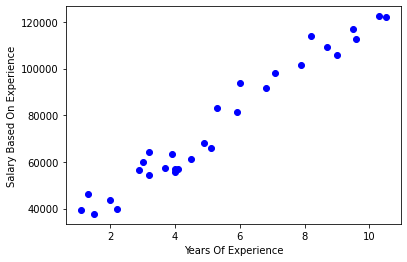

In [0]:
plt.scatter(df.YearsExperience,df.Salary,color = 'blue')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary Based On Experience')
plt.show()

In [0]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]
test

,YearsExperience,Salary
3,2.0,43525.0
6,3.0,60150.0
9,3.7,57189.0
12,4.0,56957.0
14,4.5,61111.0
19,6.0,93940.0
21,7.1,98273.0
28,10.3,122391.0


In [0]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['YearsExperience']])
train_y = np.asanyarray(train[['Salary']])
regr.fit(train_x,train_y)
# The Coefficients
print('Coefficients: ',regr.coef_)
print('Intercept: ',regr.intercept_)

Coefficients:  [[9320.24081944]]
Intercept:  [26332.24502957]


Text(0, 0.5, 'Salary Based On Experience')

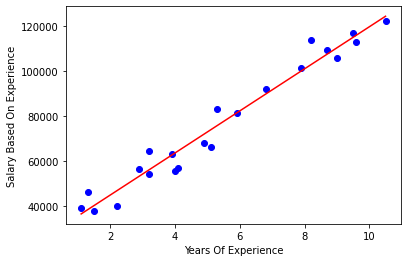

In [0]:
plt.scatter(train.YearsExperience,train.Salary,color = 'blue')
plt.plot(train_x,regr.coef_[0][0]*train_x + regr.intercept_[0],'-r')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary Based On Experience')

In [0]:
test_x = np.asanyarray(test[['YearsExperience']])
test_y = np.asanyarray(test[['Salary']])
print('Train Score: ', regr.score(train_x, train_y))  
print('Test Score: ', regr.score(test_x, test_y))

Train Score:  0.9621196214416403
Test Score:  0.9392819837227385


In [0]:
test_y_hat = regr.predict(test_x)

In [0]:
test_y_hat[0:5]

array([[ 35227.50308858],
       [ 52225.1472866 ],
       [ 81498.86784986],
       [102273.7663141 ],
       [115494.1562459 ]])

In [0]:
test_y[0:5]

array([[ 39343.],
       [ 56642.],
       [ 93940.],
       [113812.],
       [112635.]])

In [0]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 4843.47
Residual sum of squares (MSE): 35177772.74
R2-score: 0.94


In [0]:
regr.predict(test_x[0:5])

array([[39541.20103093],
       [53669.14046392],
       [55552.86572165],
       [55552.86572165],
       [62145.90412371]])

In [0]:
test_y

array([[ 37731.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 63218.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [121872.]])